In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
PATH =  '/USER/3_WEEK/MNC_NLP/'

train = pd.read_csv(os.path.join(PATH, 'train/train.csv'), encoding='utf-8')
test = pd.read_csv(os.path.join(PATH, 'test/test.csv'), encoding='utf-8')

train.head(5)

,title,comment,bias,hate
0,"""'미스터 샤인션' 변요한, 김태리와 같은 양복 입고 학당 방문! 이유는?""",김태리 정말 연기잘해 진짜,none,none
1,"""[SC현장]""""극사실주의 현실♥""""…'가장 보통의 연애' 김래원X공효진, 16년만...",공효진 발연기나이질생각이읍던데 왜계속주연일까,none,hate
2,"""손연재, 리듬체조 학원 선생님 """"하고 싶은 일 해서 행복하다""""""",누구처럼 돈만 밝히는 저급인생은 살아가지마시길~~ 행복은 머니순이 아니니깐 작은거에...,others,hate
3,"""'섹션TV' 김해숙 """"'허스토리' 촬영 후 우울증 얻었다""""""",일본 축구 져라,none,none
4,"""[단독] 임현주 아나운서 “‘노브라 챌린지’ 방송 덕에 낸 용기, 자연스런 논의의...",난 절대로 임현주 욕하는인간이랑은 안논다 @.@,none,none


In [3]:
print(train.info(), end='\n\n')
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8367 entries, 0 to 8366
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    8367 non-null   object
 1   comment  8367 non-null   object
 2   bias     8367 non-null   object
 3   hate     8367 non-null   object
dtypes: object(4)
memory usage: 261.6+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ID       511 non-null    int64 
 1   title    511 non-null    object
 2   comment  511 non-null    object
dtypes: int64(1), object(2)
memory usage: 12.1+ KB
None


In [4]:
print('Train Columns: ', train.columns)
print('Test Columns: ', test.columns)

Train Columns:  Index(['title', 'comment', 'bias', 'hate'], dtype='object')
Test Columns:  Index(['ID', 'title', 'comment'], dtype='object')


In [8]:
combinations = np.array(np.meshgrid(train.bias.unique(), train.hate.unique())).T.reshape(-1,2)
bias_hate = list(np.array([train['bias'].values, train['hate'].values]).T.reshape(-1,2))
labels = []
for i, arr in enumerate(bias_hate):
    for idx, elem in enumerate(combinations):
        if np.array_equal(elem, arr):
            labels.append(idx)

train['label'] = labels

In [15]:
# len(train)
train = train[:-367]
test = train[-367:]

In [16]:
print('Train Label: ', train['label'].value_counts(), sep='\n', end='\n\n')
print('Test Label: ', test['label'].value_counts(), sep='\n')

Train Label: 
0    3278
1    1974
3    1371
5    1163
2     134
4      80
Name: label, dtype: int64

Test Label: 
0    140
1     91
3     71
5     52
4      7
2      6
Name: label, dtype: int64


In [17]:
print('Train Null: ', train.isnull().sum(), sep='\n', end='\n\n')
print('Test Null: ', test.isnull().sum(), sep='\n')

Train Null: 
title      0
comment    0
bias       0
hate       0
label      0
dtype: int64

Test Null: 
title      0
comment    0
bias       0
hate       0
label      0
dtype: int64


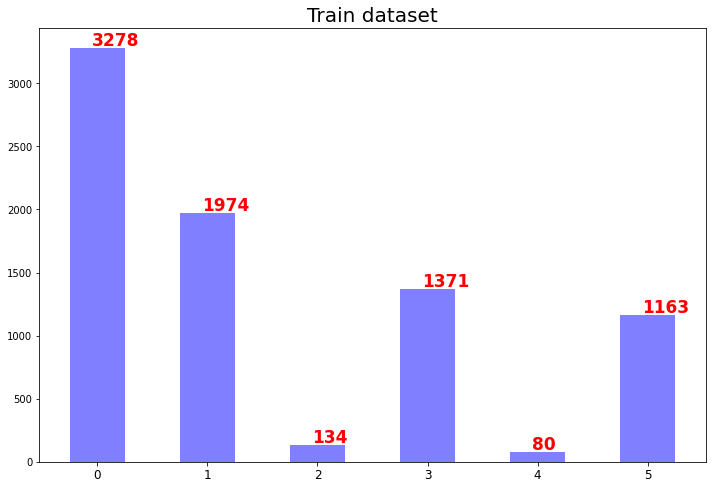

In [18]:
feature = train['label']

plt.figure(figsize=(10,7.5))
plt.title('Train dataset', fontsize=20)

temp = feature.value_counts()

font1 = {
    'color':  'red',
    'weight': 'bold',
    'size': 17,
}
# print(type(temp))
# temp = dict(temp)
# print(temp)
plt.bar(temp.keys(), temp.values, width=0.5, color='b', alpha=0.5)

plt.text(-0.05, temp.values[0]+20, s=temp.values[0],fontdict=font1)
plt.text(0.95, temp.values[1]+20, s=temp.values[1],fontdict=font1)
plt.text(1.95, temp.values[4]+20, s=temp.values[4],fontdict=font1)
plt.text(2.95, temp.values[2]+20, s=temp.values[2],fontdict=font1)
plt.text(3.95, temp.values[5]+20, s=temp.values[5],fontdict=font1)
plt.text(4.95, temp.values[3]+20, s=temp.values[3],fontdict=font1)

plt.xticks(temp.keys(), fontsize=12) # x축 값, 폰트 크기 설정
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # 레이아웃 설정
plt.show() # 그래프 나타내기

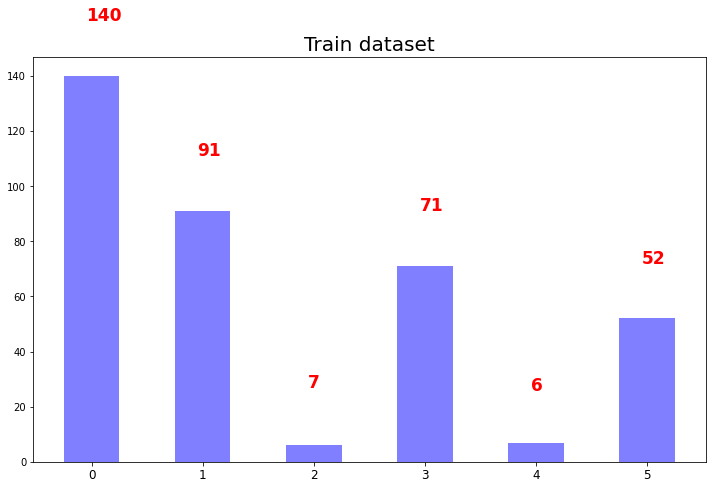

In [20]:
feature = test['label']

plt.figure(figsize=(10,7.5))
plt.title('Train dataset', fontsize=20)

temp = feature.value_counts()

font1 = {
    'color':  'red',
    'weight': 'bold',
    'size': 17,
}
# print(type(temp))
# temp = dict(temp)
# print(temp)
plt.bar(temp.keys(), temp.values, width=0.5, color='b', alpha=0.5)

plt.text(-0.05, temp.values[0]+20, s=temp.values[0],fontdict=font1)
plt.text(0.95, temp.values[1]+20, s=temp.values[1],fontdict=font1)
plt.text(1.95, temp.values[4]+20, s=temp.values[4],fontdict=font1)
plt.text(2.95, temp.values[2]+20, s=temp.values[2],fontdict=font1)
plt.text(3.95, temp.values[5]+20, s=temp.values[5],fontdict=font1)
plt.text(4.95, temp.values[3]+20, s=temp.values[3],fontdict=font1)

plt.xticks(temp.keys(), fontsize=12) # x축 값, 폰트 크기 설정
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # 레이아웃 설정
plt.show() # 그래프 나타내기

In [21]:
max_len = np.max(train['title'].str.len())
min_len = np.min(train['title'].str.len())
mean_len = np.mean(train['title'].str.len())

print('Max Premise Length: ', max_len)
print('Min Premise Length: ', min_len)
print('Mean Premise Lenght: ', mean_len, '\n')

max_len = np.max(train['comment'].str.len())
min_len = np.min(train['comment'].str.len())
mean_len = np.mean(train['comment'].str.len())

print('Max Hypothesis Length: ', max_len)
print('Min Hypothesis Length: ', min_len)
print('Mean Hypothesis Lenght: ', mean_len)

Max Premise Length:  63
Min Premise Length:  2
Mean Premise Lenght:  42.46475 

Max Hypothesis Length:  137
Min Hypothesis Length:  4
Mean Hypothesis Lenght:  38.710625


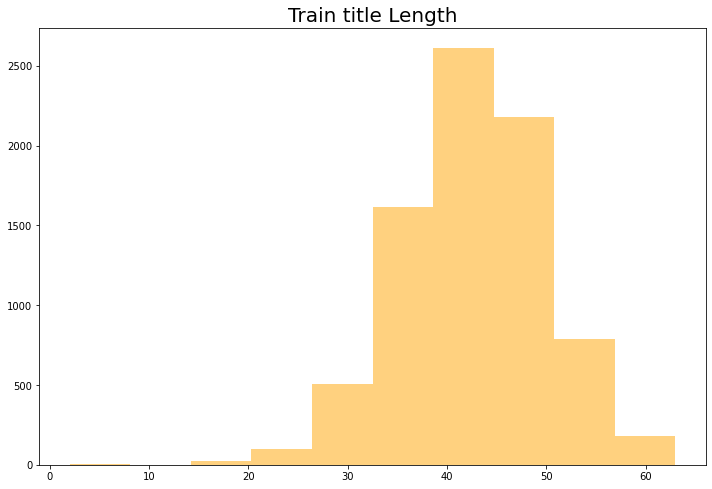

In [27]:
from collections import Counter

plt.figure(figsize=(10,7.5))
plt.title('Train title Length', fontsize=20)

plt.hist(train['title'].str.len(), alpha=0.5, color='orange')
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # 레이아웃 설정

plt.show()

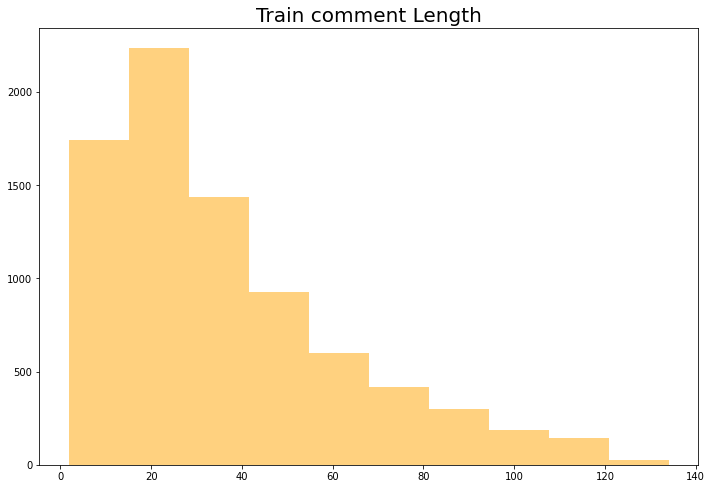

In [37]:
plt.figure(figsize=(10,7.5))
plt.title('Train comment Length', fontsize=20)

plt.hist(train['comment'].str.len(), alpha=0.5, color='orange')
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # 레이아웃 설정

plt.show()

In [30]:
train['title'] = train['title'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 0-9]', '')
test['title'] = test['title'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 0-9]", "")
train['comment'] = train['comment'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 0-9]', '')
test['comment'] = test['comment'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 0-9]", "")
train.head(5)

/tmp/ipykernel_65373/2562897324.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train['title'] = train['title'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 0-9]', '')
/tmp/ipykernel_65373/2562897324.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  test['title'] = test['title'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 0-9]", "")
/tmp/ipykernel_65373/2562897324.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['title'] = test['title'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 0-9]", "")
/tmp/ipykernel_65373/2562897324.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  train['comment'] = train['comment'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 0-9]', ''

,title,comment,bias,hate,label
0,미스터 샤인션 변요한 김태리와 같은 양복 입고 학당 방문 이유는,김태리 정말 연기잘해 진짜,none,none,0
1,현장극사실주의 현실가장 보통의 연애 김래원공효진 16년만의 랑데부종합,공효진 발연기나이질생각이읍던데 왜계속주연일까,none,hate,1
2,손연재 리듬체조 학원 선생님 하고 싶은 일 해서 행복하다,누구처럼 돈만 밝히는 저급인생은 살아가지마시길 행복은 머니순이 아니니깐 작은거에 감...,others,hate,3
3,섹션 김해숙 허스토리 촬영 후 우울증 얻었다,일본 축구 져라,none,none,0
4,단독 임현주 아나운서 노브라 챌린지 방송 덕에 낸 용기 자연스런 논의의 창 됐으면 인터뷰,난 절대로 임현주 욕하는인간이랑은 안논다,none,none,0


In [82]:
!pip install -U transformers

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
  Using cached transformers-4.16.2-py3-none-any.whl (3.5 MB)
  Using cached tokenizers-0.11.5-cp38-cp38-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (6.8 MB)
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.8.0rc4
    Uninstalling tokenizers-0.8.0rc4:
      Successfully uninstalled tokenizers-0.8.0rc4
  Attempting uninstall: transformers
    Found existing installation: transformers 3.0.0
    Uninstalling transformers-3.0.0:
      Successfully uninstalled transformers-3.0.0


In [70]:
import os
import random
from tqdm import tqdm

import torch
import torch.nn.functional as F
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from transformers import TrainingArguments, Trainer
from transformers import AutoModelForSequenceClassification, AutoConfig, AutoTokenizer


In [83]:
def seed_everything(seed:int = 1004):
    random.seed(seed)
    np.random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)  # type: ignore
    torch.backends.cudnn.deterministic = True  # type: ignore
    torch.backends.cudnn.benchmark = True  # type: ignore

seed_everything(42)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [87]:
MODEL_NAME = 'klue/roberta-large'

tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

config = AutoConfig.from_pretrained(MODEL_NAME)
config.num_labels = 3

model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME, config=config)

print(model)
print(config)

loading file https://huggingface.co/klue/roberta-large/resolve/main/vocab.txt from cache at /root/.cache/huggingface/transformers/4eb906e7d0da2b04e56c7cc31ba068d7c295240a51690153c2ced71c9e4c9fc5.d1b86bed49516351c7bb29b19d7e7be2ab53b931bcb1f9b2aacfb71f2124d25a
loading file https://huggingface.co/klue/roberta-large/resolve/main/tokenizer.json from cache at /root/.cache/huggingface/transformers/360b579947002f14f22331a026821b56f70679f1be1e95fe5dc5a80edc4a59e0.44c30ade4958fcfd446e66025e10a5b380cdd0bbe9b3fb7a794f357e7f0f34c2
loading file https://huggingface.co/klue/roberta-large/resolve/main/added_tokens.json from cache at None
loading file https://huggingface.co/klue/roberta-large/resolve/main/special_tokens_map.json from cache at /root/.cache/huggingface/transformers/1a24ab4628028ed80dea35ce3334a636dc656fd9a17a09bad377f88f0cbecdac.70c17d6e4d492c8f24f5bb97ab56c7f272e947112c6faf9dd846da42ba13eb23
loading file https://huggingface.co/klue/roberta-large/resolve/main/tokenizer_config.json from c

RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(32000, 1024, padding_idx=1)
      (position_embeddings): Embedding(514, 1024, padding_idx=1)
      (token_type_embeddings): Embedding(1, 1024)
      (LayerNorm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0): RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=1024, out_features=1024, bias=True)
              (key): Linear(in_features=1024, out_features=1024, bias=True)
              (value): Linear(in_features=1024, out_features=1024, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=1024, out_features=1024, bias=True)
         

In [88]:
train_dataset, eval_dataset = train_test_split(train, test_size=0.2, shuffle=True, stratify=train['label'])

tokenized_train = tokenizer(
    list(train_dataset['title']),
    list(train_dataset['comment']),
    return_tensors="pt",
    max_length=256, # Max_Length = 140
    padding=True,
    truncation=True,
    add_special_tokens=True
)

tokenized_eval = tokenizer(
    list(eval_dataset['title']),
    list(eval_dataset['comment']),
    return_tensors="pt",
    max_length=256,
    padding=True,
    truncation=True,
    add_special_tokens=True
)

print(tokenized_train['input_ids'][0])
print(tokenizer.decode(tokenized_train['input_ids'][0]))

tensor([    0,  1443,  2792,  2800,  8855,  2504, 14903,  7952,  2701,  3983,
         5180,  2382,  2437,  2205,  2318,  4151,  2371,  2062,  3752,     2,
         1405,  2116, 19954, 14036,  4015,  2116,   859,  2259,  2249,  1345,
         2181,     2,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1])
[CLS] 오또맘 장성규 팔로우 게시글 결국 사과경솔하게 행동했다 전문 [SEP] 얘가 뭔데기사거리가 되는걸 써라 [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PA

In [89]:
class BERTDataset(torch.utils.data.Dataset):
    def __init__(self, pair_dataset, label):
        self.pair_dataset = pair_dataset
        self.label = label

    def __getitem__(self, idx):
        item = {key: val[idx].clone().detach() for key, val in self.pair_dataset.items()}
        item['label'] = torch.tensor(self.label[idx])
        
        return item

    def __len__(self):
        return len(self.label)

In [90]:
def label_to_num(label):
    label_dict = {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5}
    num_label = []

    for v in label:
        num_label.append(label_dict[v])
    
    return num_label


train_label = label_to_num(train_dataset['label'].values)
eval_label = label_to_num(eval_dataset['label'].values)

In [91]:
train_dataset = BERTDataset(tokenized_train, train_label)
eval_dataset = BERTDataset(tokenized_eval, eval_label)

print(train_dataset.__len__())
print(train_dataset.__getitem__(3333))
print(tokenizer.decode(train_dataset.__getitem__(3333)['input_ids']))

6400
{'input_ids': tensor([    0,  6040,  2280, 26708,  1510,  2603,  2059, 14691,  3535,  2310,
         4829,  4319,  2289,  2118,  2056,  4507,  7703,  2170,  1528,  2536,
         2042,     2,  3994,  2073, 30055,  2259,  4369,  2170,  1460,  1176,
         2069,  2369,  5124,  6080, 11336,  2052,  2203,  1460,  3737,  4996,
         5497,  1077, 10893,  2275,  8174, 22883,  8174,  2348,  2116,  1460,
         2052,  2030,  2209,     2,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1]), 'token_type_ids': tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [92]:
def compute_metrics(pred):
  """ validation을 위한 metrics function """
  labels = pred.label_ids
  preds = pred.predictions.argmax(-1)
  probs = pred.predictions

  # calculate accuracy using sklearn's function
  acc = accuracy_score(labels, preds) # 리더보드 평가에는 포함되지 않습니다.

  return {
      'accuracy': acc,
  }

In [98]:
training_ars = TrainingArguments(
    # output_dir='/USER/3_WEEK/MNC_NLP/comment_baseline/result',
    output_dir='./result',
    num_train_epochs=7,
    per_device_train_batch_size=32,
    save_total_limit=5,
    save_steps=500,
    evaluation_strategy='steps',
    eval_steps = 500,
    load_best_model_at_end = True,
)

trainer = Trainer(
    model=model,
    args=training_ars,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)
# CUDA_LAUNCH_BLOCKING=1 

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call,so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.

In [94]:
trainer.train()
# model.save_pretrained('/USER/3_WEEK/MNC_NLP/comment_baseline/result/best_model')
model.save_pretrained('./result/best_model')

/opt/conda/lib/python3.8/site-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use thePyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 6400
  Num Epochs = 7
  Instantaneous batch size per device = 32
  Total train batch size (w. parallel, distributed & accumulation) = 32
  Gradient Accumulation steps = 1
  Total optimization steps = 1400


RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call,so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.

In [61]:
!nvidia-smi

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Mon Feb 28 00:52:25 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.32.00    Driver Version: 455.32.00    CUDA Version: 11.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:86:00.0 Off |                    0 |
| N/